In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import tensorflow
from tensorflow import keras

2025-06-26 12:14:22.649667: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750940062.881299      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750940062.968857      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
tensorflow.__version__

'2.18.0'

In [6]:
pip install --upgrade tensorflow==2.19.0 --user

Note: you may need to restart the kernel to use updated packages.


In [8]:
tensorflow.__version__

'2.18.0'

In [9]:
import matplotlib.pyplot as plt

In [10]:
!pip install split-folders

In [11]:
import splitfolders
splitfolders.ratio("/kaggle/input/photos/data", output="main",seed=1337, ratio=(.7, .2, .1))

Copying files: 5194 files [00:22, 233.42 files/s]


In [12]:
train = keras.utils.image_dataset_from_directory(
    "/kaggle/working/main/train",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    verbose=True,
)
val = keras.utils.image_dataset_from_directory(
    "/kaggle/working/main/val",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    verbose=True,
)
test = keras.utils.image_dataset_from_directory(
    "/kaggle/working/main/test",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    verbose=True,
)

Found 3635 files belonging to 5 classes.


I0000 00:00:1750940647.447244      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Found 1038 files belonging to 5 classes.
Found 521 files belonging to 5 classes.


In [13]:

checkpoint  = tensorflow.keras.callbacks.ModelCheckpoint(
    "/kaggle/working/mobilenet_scrath_model.keras",
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    save_freq='epoch',
    verbose = 1,
)

early_stop = tensorflow.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

requirements6 = [checkpoint, early_stop]

In [14]:
mobilenet_scratch = keras.applications.MobileNet(include_top=False,weights=None,input_shape=(224,224,3))

model1 = keras.Sequential([
    mobilenet_scratch,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(1024,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(), 
    
    keras.layers.Dense(1024,activation="relu"),
    
    keras.layers.Dense(17,activation="softmax")
])
model1.summary()

model1.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history_model7 = model1.fit(train,epochs=50,batch_size=512,validation_data=[val], callbacks = requirements6)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 17)                  │          17,425 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,349,585 (20.41 MB)

 Trainable params: 5,325,649 (20.32 MB)

 Non-trainable params: 23,936 (93.50 KB)

Epoch 1/50


I0000 00:00:1750940769.810833     126 service.cc:148] XLA service 0x7c55ec00c110 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750940769.810912     126 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1750940771.646095     126 cuda_dnn.cc:529] Loaded cuDNN version 90300
E0000 00:00:1750940775.694102     126 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1750940775.894668     126 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


  2/114 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.2031 - loss: 3.8134    

I0000 00:00:1750940781.713606     126 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


113/114 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7497 - loss: 1.7481

E0000 00:00:1750940793.139364     124 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1750940793.341952     124 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.7508 - loss: 1.7436
Epoch 1: val_loss improved from inf to 3.34389, saving model to /kaggle/working/mobilenet_scrath_model.keras
114/114 ━━━━━━━━━━━━━━━━━━━━ 55s 199ms/step - accuracy: 0.7519 - loss: 1.7391 - val_accuracy: 0.1541 - val_loss: 3.3439
Epoch 2/50
113/114 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9796 - loss: 0.7289
Epoch 2: val_loss did not improve from 3.34389
114/114 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.9796 - loss: 0.7281 - val_accuracy: 0.1541 - val_loss: 7.2098
Epoch 3/50
113/114 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9774 - loss: 0.5112
Epoch 3: val_loss did not improve from 3.34389
114/114 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.9775 - loss: 0.5103 - val_accuracy: 0.1541 - val_loss: 7.1279
Epoch 4/50
113/114 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9651 - loss: 0.4495
Epoch 4: val_loss did not improve from 3.34389
114/114 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.

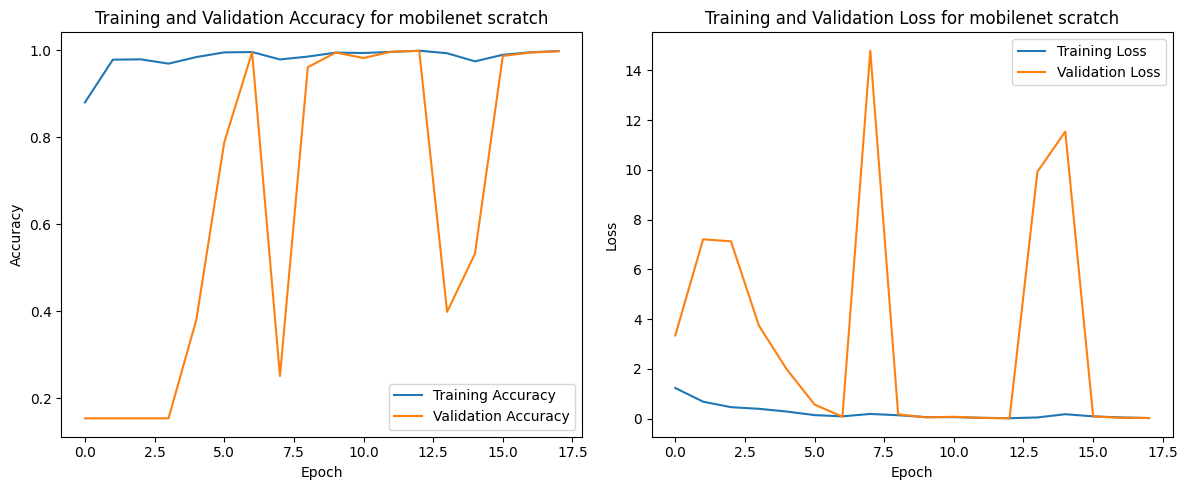

In [15]:
# Plotting the graphs side by side
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_model7.history['accuracy'], label='Training Accuracy')
plt.plot(history_model7.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for mobilenet scratch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_model7.history['loss'], label='Training Loss')
plt.plot(history_model7.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for mobilenet scratch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig(r"/kaggle/working/mobilenet_scrath_model.jpg")
plt.show()

In [16]:

checkpoint  = tensorflow.keras.callbacks.ModelCheckpoint(
    "/kaggle/working/mobilenet_trans1.keras",
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    save_freq='epoch',
    verbose = 1,
)

early_stop = tensorflow.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

requirements7 = [checkpoint, early_stop]


In [17]:

mobile_trans1 = keras.applications.MobileNet(include_top=False,weights="imagenet",input_shape=(224,224,3))
for layer in mobile_trans1.layers:
    layer.trainable = False

model2 = keras.Sequential([
    mobile_trans1,
    keras.layers.GlobalAveragePooling2D(), # GlobalAveragePoolingLayer
    keras.layers.Dense(512,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(512,activation="relu"),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(17,activation="softmax")
])
model2.summary()
model2.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history_model8 = model2.fit(train,epochs=50,batch_size=512,validation_data=[val], callbacks = requirements7)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 17)                  │           8,721 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,029,137 (15.37 MB)

 Trainable params: 798,225 (3.04 MB)

 Non-trainable params: 3,230,912 (12.32 MB)

Epoch 1/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9036 - loss: 0.9505
Epoch 1: val_loss improved from inf to 0.69383, saving model to /kaggle/working/mobilenet_trans1.keras
114/114 ━━━━━━━━━━━━━━━━━━━━ 16s 75ms/step - accuracy: 0.9042 - loss: 0.9476 - val_accuracy: 0.9422 - val_loss: 0.6938
Epoch 2/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9865 - loss: 0.4141
Epoch 2: val_loss improved from 0.69383 to 0.31586, saving model to /kaggle/working/mobilenet_trans1.keras
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9865 - loss: 0.4139 - val_accuracy: 0.9961 - val_loss: 0.3159
Epoch 3/50
112/114 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9944 - loss: 0.2976
Epoch 3: val_loss did not improve from 0.31586
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9943 - loss: 0.2973 - val_accuracy: 0.9701 - val_loss: 0.3352
Epoch 4/50
112/114 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9948 - loss: 0.2395
Epoch 4: val_loss improved from 0.31586 

In [18]:
mobile_trans1 = keras.applications.MobileNet(include_top=False,weights="imagenet",input_shape=(224,224,3))
for layer in mobile_trans1.layers:
    layer.trainable = False

model2 = keras.Sequential([
    mobile_trans1,
    keras.layers.GlobalAveragePooling2D(), # GlobalAveragePoolingLayer
    keras.layers.Dense(512,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(512,activation="relu"),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(17,activation="softmax")
])
model2.summary()
model2.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history_model8 = model2.fit(train,epochs=50,batch_size=512,validation_data=[val], callbacks = requirements7)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 17)                  │           8,721 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,029,137 (15.37 MB)

 Trainable params: 798,225 (3.04 MB)

 Non-trainable params: 3,230,912 (12.32 MB)

Epoch 1/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9052 - loss: 0.9388
Epoch 1: val_loss did not improve from 0.05705
114/114 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.9057 - loss: 0.9360 - val_accuracy: 0.9364 - val_loss: 0.6480
Epoch 2/50
112/114 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9912 - loss: 0.4018
Epoch 2: val_loss did not improve from 0.05705
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9912 - loss: 0.4012 - val_accuracy: 0.9884 - val_loss: 0.3234
Epoch 3/50
112/114 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9947 - loss: 0.2887
Epoch 3: val_loss did not improve from 0.05705
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9947 - loss: 0.2883 - val_accuracy: 0.9961 - val_loss: 0.2417
Epoch 4/50
112/114 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9956 - loss: 0.2279
Epoch 4: val_loss did not improve from 0.05705
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9956 - loss: 0.2277 - val_accuracy: 0.9971 - val_loss

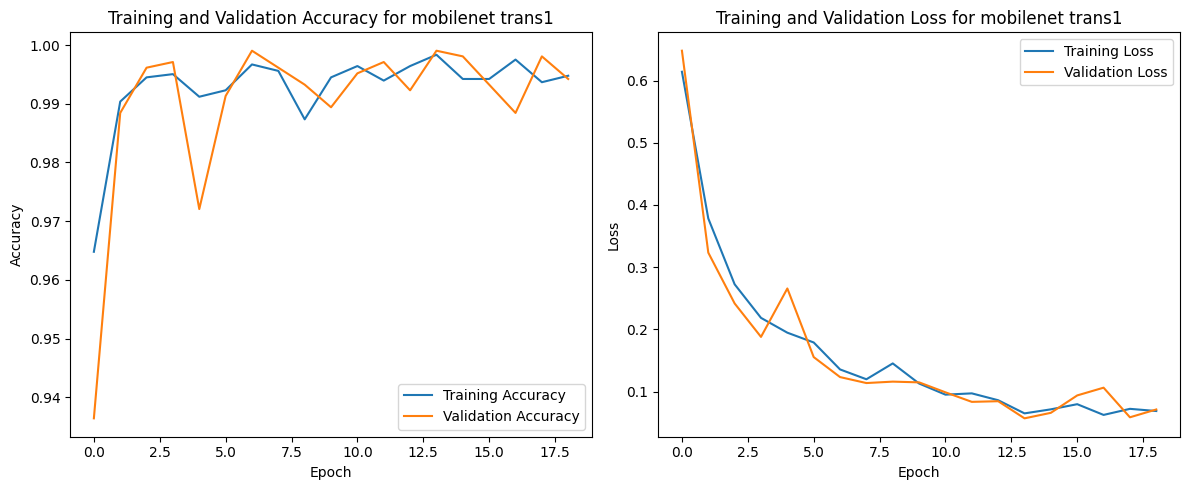

In [19]:
# Plotting the graphs side by side
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_model8.history['accuracy'], label='Training Accuracy')
plt.plot(history_model8.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for mobilenet trans1')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_model8.history['loss'], label='Training Loss')
plt.plot(history_model8.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for mobilenet trans1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig(r"/kaggle/working/mobilenet_trans1.jpg")
plt.show()

In [20]:

checkpoint  = tensorflow.keras.callbacks.ModelCheckpoint(
    "/kaggle/working/mobilenet_trans2.keras",
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    save_freq='epoch',
    verbose = 1,
)

early_stop = tensorflow.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

requirements8 = [checkpoint, early_stop]


In [21]:
mobile_transf2 = keras.applications.MobileNet(include_top=False,weights="imagenet",input_shape=(224,224,3))

for layer in mobile_transf2.layers:
    if layer.name == 'conv_dw_1_relu' or  layer.name == 'conv_dw_2_relu' or layer.name ==  'conv_pw_9' or layer.name == "conv_pw_11_relu" or layer.name == "conv_pw_13":
      layer.trainable = False

model3 = keras.Sequential([
    mobile_transf2,
    keras.layers.GlobalAveragePooling2D(), # GlobalAveragePoolingLayer
    keras.layers.Dense(1000,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),

    keras.layers.Dense(1000,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(17,activation="softmax")
])
model3.summary()
model3.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history_model9 = model3.fit(train,epochs=50,batch_size=512,validation_data=val,callbacks=requirements8)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1000)                │       1,025,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 17)                  │          17,017 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,271,881 (20.11 MB)

 Trainable params: 3,939,273 (15.03 MB)

 Non-trainable params: 1,332,608 (5.08 MB)

Epoch 1/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.8749 - loss: 2.1158
Epoch 1: val_loss improved from inf to 2.74387, saving model to /kaggle/working/mobilenet_trans2.keras
114/114 ━━━━━━━━━━━━━━━━━━━━ 46s 169ms/step - accuracy: 0.8757 - loss: 2.1116 - val_accuracy: 0.6869 - val_loss: 2.7439
Epoch 2/50
113/114 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9847 - loss: 1.0390
Epoch 2: val_loss improved from 2.74387 to 0.65383, saving model to /kaggle/working/mobilenet_trans2.keras
114/114 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - accuracy: 0.9848 - loss: 1.0365 - val_accuracy: 1.0000 - val_loss: 0.6538
Epoch 3/50
113/114 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9961 - loss: 0.5943
Epoch 3: val_loss improved from 0.65383 to 0.39590, saving model to /kaggle/working/mobilenet_trans2.keras
114/114 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.9961 - loss: 0.5932 - val_accuracy: 1.0000 - val_loss: 0.3959
Epoch 4/50
113/114 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 

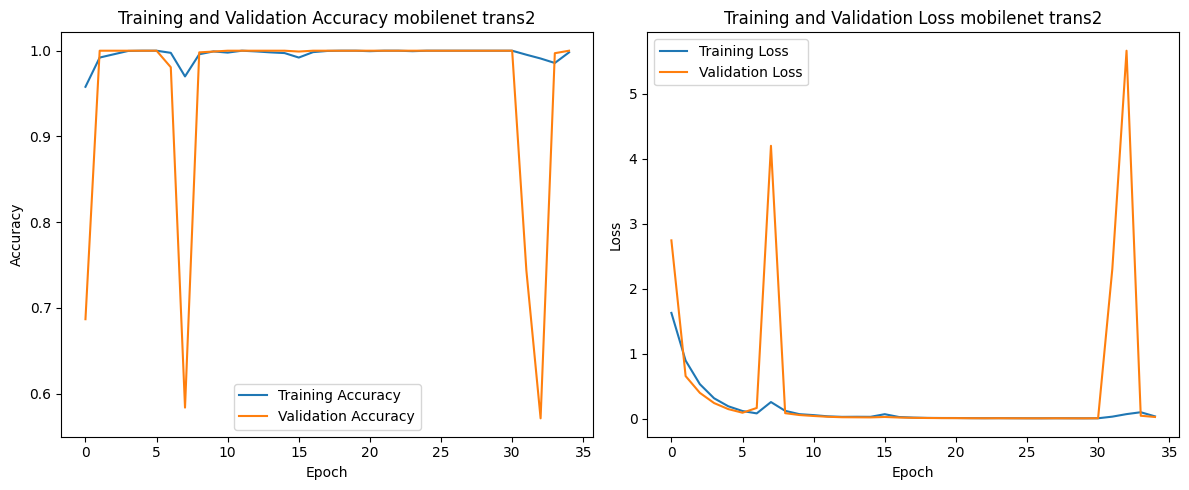

In [22]:
# Plotting the graphs side by side
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_model9.history['accuracy'], label='Training Accuracy')
plt.plot(history_model9.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy mobilenet trans2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_model9.history['loss'], label='Training Loss')
plt.plot(history_model9.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss mobilenet trans2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig(r"/kaggle/working/mobilenet_trans2.jpg")
plt.show()

In [ ]:
import shutil
shutil.make_archive('mobile_net', 'zip', '/kaggle/working/')